<a href="https://colab.research.google.com/github/na0495/mnist-colab/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
# Install dep
!pip install -q --upgrade tensorflow

In [69]:
# Load the dep

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib inline

In [70]:
# Load mnist dataset 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize data to make it easier for the network to learn
# because each "pixel" is a feature, and each feature currently ranges from 0 to 255. Not quite 0 to 1. 
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [71]:
# check the shape of trainning data
x_train.shape

(60000, 28, 28)

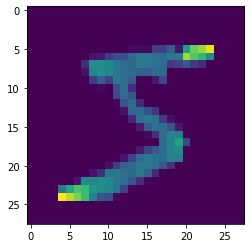

In [72]:
# display element
plt.imshow(x_train[0])
plt.show()

In [73]:
# we use a sequential model since we want to go in direct order
model = tf.keras.models.Sequential()
# we need to take this 28x28 image, and make it a flat 1x784. so we use Flatten
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# This is our final layer. It has 10 nodes. 1 node per possible number prediction.
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [74]:
# model training
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2684 - accuracy: 0.9217
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1094 - accuracy: 0.9671
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0729 - accuracy: 0.9768


In [59]:
# model evaluation
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2757 - accuracy: 0.9397
0.2756880223751068 0.9397000074386597


In [60]:
model.save('num_reader.model')

In [67]:
# make predections
predictions = model.predict([x_test])

313/313 [==============================] - 1s 2ms/step


In [61]:
print(np.argmax(predictions[0]))

7


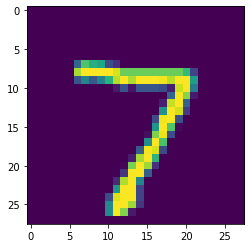

In [62]:
plt.imshow(x_test[0])
plt.show()